<a href="https://colab.research.google.com/github/devzohaib/Honey-Production/blob/master/Honey_Production_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://raw.githubusercontent.com/devzohaib/Honey-Production/master/honeyproduction.csv")

### Use .head() to get a sense of how this DataFrame is structured.

In [2]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### For now, we care about the total production of honey per year. Use the `.groupby()` method provided by pandas to get the mean of `totalprod` per year. Store this in a variable called `prod_per_year.`

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


### Create a variable called `X` that is the column of `years` in this `prod_per_year` DataFrame. After creating `X`, we will need to reshape it to get it into the right format, using this command: 
`X = X.values.reshape(-1, 1)`

In [5]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)

### Create a variable called `y` that is the `totalprod` column in the `prod_per_year` dataset.

In [6]:
y = prod_per_year['totalprod']


### Using `plt.scatter()`, plot y vs X as a scatterplot. Display the plot using `plt.show()`. Can you see a vaguely linear relationship between these variables?

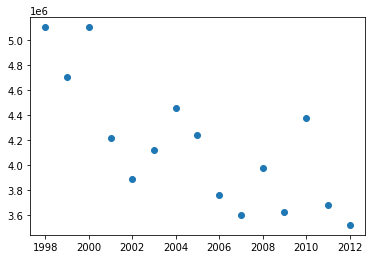

In [7]:
plt.scatter(X,y)
plt.show()

# Create and Fit a Linear Regression Model

### Create a linear regression model from scikit-learn and call it `regr`. Use the `LinearRegression`() constructor from the `linear_model` module to do this.

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
regr.coef_
regr.intercept_

181208083.10732976

In [10]:
y_predict = regr.predict(X)


Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

Make sure to call plt.show() after plotting the line.

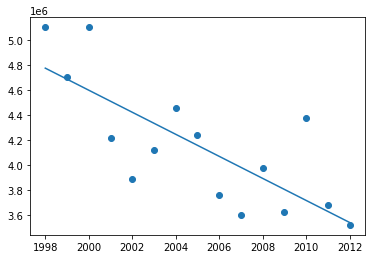

In [14]:
plt.scatter(X,y)
plt.plot(X,y_predict)
plt.show()

###So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production. Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050. 

You can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.

In [15]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)


###Create a list called `future_predict` that is the y-values that your regr model would predict for the values of `X_future`.

In [17]:
future_predict = regr.predict(X_future)



### Plot future_predict vs X_future on a different plot.

####How much honey will be produced in the year 2050, according to this?

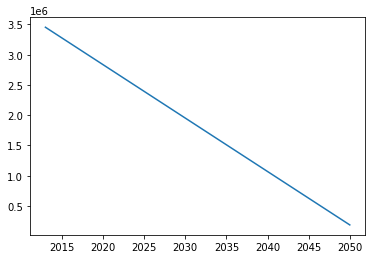

In [18]:
plt.plot(X_future,future_predict)